In [28]:
import sys
import os
import echolab2
import lzma

In [29]:
# -*- coding: utf-8 -*-
"""A simple ek60 reader test.

This script demonstrates simple file reading and plotting of ek60 data.  In
general, the script reads files passed to it, stores data in a data object,
parses information from the data, and generates plots.  Specifically,
this script demonstrates processes such as retrieving values from the data (
power, Sv, and angles from specified channels/frequencies), appending and
inserting data from different sample intervals, and using matplotlib to
plot echograms.
"""

from matplotlib.pyplot import figure, show, subplots_adjust, get_cmap
from echolab2.instruments import EK80
from echolab2.plotting.matplotlib import echogram

In [30]:
# Create the list of input files.  For this test we purposely picked two files
# with the same channels, but with different pulse lengths and a different
# installation order.

# The descriptions below apply to reading these 2 files in the following order.
rawfiles ='./data/N1-D20201106-T015512.raw'

compressedfiles = rawfiles + '.xz'

with lzma.open(compressedfiles) as f, open(rawfiles, 'wb') as fout:
    file_content = f.read()
    fout.write(file_content)

In [31]:
# Create a matplotlib figure to plot our echograms on.
fig = figure()
# Set some properties for the sub plot layout.
subplots_adjust(left=0.11, bottom=0.1, right=0.98, top=.93, wspace=None,
                hspace=0.9)

<Figure size 432x288 with 0 Axes>

In [32]:
# Create an instance of the EK60 instrument. This is the top level object used
# to interact with EK60 and  data sources.
ek80 = EK80.EK80()

In [33]:
# Use the read_raw method to read in our list of data files. Assuming the
# data files haven't been changed above, the these files contain data from a
# 5 frequency EK60 system: 18, 38, 70, 120, and 200 kHz.
ek80.read_raw(rawfiles)

In [34]:
# Print some basic info about our object. As you will see, 10 channels are
# reported.  Each file has 5 channels, and are in fact, physically the same
# hardware.  The reason 10 channels are reported is because the transceiver
# installation order was changed in the ER60 software which changes the
# channel ID for that transceiver + transducer combination.
print(ek80)

<class 'echolab2.instruments.EK80.EK80'> at 0x143970f40
    EK80 object contains data from 2 channels:
        WBT Mini 253624-15-1 ES70-7CD :: complex-FM (10, 166667, 4)
        WBT Mini 253624-15-2 ES70-7CD :: complex-FM (10, 166667, 4)
    data start time: 2020-11-06T01:55:12.499
      data end time: 2020-11-06T01:55:33.336
    number of pings: 20



In [35]:
ek80.__dict__


 'store_power': True,
 'store_complex': True,
 'read_max_sample_count': None,
 'read_start_time': None,
 'read_end_time': None,
 'read_start_ping': None,
 'read_end_ping': None,
 'read_start_sample': None,
 'read_end_sample': None,
 'read_frequencies': [],
 'read_channel_ids': [],
 'start_time': numpy.datetime64('2020-11-06T01:55:12.499'),
 'end_time': numpy.datetime64('2020-11-06T01:55:33.336'),
 'start_ping': 1,
 'end_ping': 20,
 'n_pings': 20,
 'n_files': 0,
 'channel_ids': ['WBT Mini 253624-15-1 ES70-7CD',
  'WBT Mini 253624-15-2 ES70-7CD'],
 'n_channels': 2,
 'raw_data': {'WBT Mini 253624-15-1 ES70-7CD': [<echolab2.instruments.EK80.raw_data at 0x141be4f70>],
  'WBT Mini 253624-15-2 ES70-7CD': [<echolab2.instruments.EK80.raw_data at 0x143423f10>]},
 'frequency_map': {70000.0: ['WBT Mini 253624-15-1 ES70-7CD',
   'WBT Mini 253624-15-2 ES70-7CD']},
 'nmea_data': <echolab2.instruments.util.nmea_data.nmea_data at 0x14395d2e0>,
 'motion_data': <echolab2.instruments.util.motion_data.mot

In [36]:
# If you look at the output of the print statement you'll see some basic information
# about the channels that have been read. Each channel is listed in the form
#
#    channel number :: channel ID :: data type (data size)
#
# The channel number is simply the order the unique channel IDs were encountered
# in the the reading process. Channels are identified in the file header. I
# believe that they are always sorted by frequency from low to high and the
# reader encounters them in this order so channel 1 should always be the lowest
# frequency in the file. How channels are ordered if you have multiple GPTs
# operating at the same frequency or if you're using ER60 multiplexing.
#
# Channel ID is the unique string that the ER60/EK80 software assigns the
# channel. This usually includes a hardware ID (MAC address) and the
# transducer model number. The ER60 software adds the transceiver installation
# order and MUX channel between these but I am not sure about EK80.
#
# Data type describes the kind of data stored in the raw_data object associated
# with this channel. Raw files can contain power only, angle only, power AND angle,
# and EK80 files can contain complex data. Following this, raw_data objects can contain
# power, angle, power AND angle, or complex data. If a new data type is encountered
# while reading data from a specific channel ID, a new raw_data object is created for
# that data. In our case, all of the channels contain power and angle data. But if
# you read a file that contained only angle data, then a file with the same channels
# that had power/angle data, each channel would contain two raw_data objects, one
# containing the angle only data and one containing the power and angle data.

# The size of the data array(s) is printed next in the form (n pings, n samples)

print(ek80.channel_ids)

raw_list = ek80.raw_data[ek80.channel_ids[0]]
raw_data = raw_list[0]

print(raw_data.pulse_form)

print(raw_data.configuration[0]['transceiver_type'])

calibration = raw_data.get_calibration()

calibration = raw_data.get_calibration()

#  convert to power
ek80_power = raw_data.get_power(calibration=calibration)

#  convert to Sv
ek80_Sv = raw_data.get_Sv(calibration=calibration)

#  and convert to Ts
ek80_Ts = raw_data.get_Sp(calibration=calibration)


['WBT Mini 253624-15-1 ES70-7CD', 'WBT Mini 253624-15-2 ES70-7CD']
[1 1 1 1 1 1 1 1 1 1]
WBT Mini


In [37]:
# ER60 objects contain all the data stored in a .raw file organized in a number
# of attributes. The bulk of the data are stored in raw_data objects and getting
# a reference to these raw_data objects is one of the first things you'll usually
# do when processing .raw data. You can access the ER60.raw_data attribute directly
# (it is a dictionary keyed by channel ID) or you can use the EK60.get_channel_data()
# method which allows you to get references by channel number, frequency, and/or
# channel ID.

# Here I will get references to the 38 kHz data. Since we read data at 38 kHz from
# two channels, this will return a list 2 items long. Each item in this list will
# be a raw_data object containing 38 kHz data associate with a channel+datatype. In
# this example the data files only have power/angle data so there will only be a
# single raw_data object per channel.
raw_data_38 = ek80.get_channel_data(frequencies=70000)

In [38]:
print(raw_data_38)

{70000: [<echolab2.instruments.EK80.raw_data object at 0x141be4f70>, <echolab2.instruments.EK80.raw_data object at 0x143423f10>]}


In [39]:
# When working with this library, you are either going to know something about the
# data you are reading and you will be able to make assumptions about the dict that
# is returned or you'll know nothing and need to iterate through the dict keys and
# lists they reference and process each raw_data object as needed. Here we know that
# the dict will have a single key (38000) and that list will be 2 elements long.
# Because we know this we can unpack "manually"

# get a reference to the first raw_data object at 38 kHz
raw_data_38_1 = raw_data_38[70000][0]
#                             ^    ^
#                 frequency --|    |-- channel+datatype index

# and to the second....
raw_data_38_2 = raw_data_38[70000][1]
#                             ^    ^
#                 frequency --|    |-- channel+datatype index

In [40]:
# The sample data from the first 38 kHz channel is contained in a 136x994 array.
# The data was recorded with a 1024us transmit pulse length, which on the EK60
# and related hardware results in a sample interval of 256us (sample interval = pulse
# length / 4). The data were recorded in 2012.
raw_data_38_1.__dict__

05673501e-01j,  0.10811213-2.32748196e-01j,
         0.24374829-1.55582726e-01j,  0.30055264-7.19393163e-20j,
         0.24374829+1.55582726e-01j,  0.10811213+2.32748196e-01j,
        -0.02739346+2.05673501e-01j, -0.09545949+1.13685265e-01j,
        -0.08309092+2.65394617e-02j, -0.0303885 -7.44019495e-03j,
         0.00839435+1.04414914e-02j,  0.00668996+4.24659587e-02j,
        -0.02201745+5.20463064e-02j, -0.04536988+3.19380984e-02j,
        -0.04339002+2.64110509e-03j, -0.02241065-1.15447324e-02j,
        -0.00377272-4.29621618e-03j, -0.00210731+1.10697458e-02j,
        -0.01400079+1.73285604e-02j, -0.02479025+9.25655477e-03j,
        -0.02387437-4.28514462e-03j, -0.01329891-1.11636259e-02j,
        -0.00333323-7.48714898e-03j, -0.00160686+6.03235152e-04j,
        -0.00684864+4.49852599e-03j, -0.01191546+1.32703967e-03j,
        -0.01145674-4.72723134e-03j, -0.00631993-7.73546286e-03j,
        -0.00141086-5.74369030e-03j, -0.0003738 -1.63414935e-03j,
        -0.00262114+5.69514406e-

In [41]:
print(raw_data_38_1)

<class 'echolab2.instruments.EK80.raw_data'> at 0x141be4f70
                   channel: WBT Mini 253624-15-1 ES70-7CD
frequency start (first ping): 45000.0
  frequency end (first ping): 90000.0
   pulse length (first ping): 0.002048
             data start time: 2020-11-06T01:55:12.499
               data end time: 2020-11-06T01:55:31.772
             number of pings: 10
                  data type: FM
   complex array dimensions: (10,166667,4)



In [42]:
# Append the 2nd object's data to the first and print out the results. We use the
# append method, passing the raw_data_38_2 reference. Note that data in raw_data
# objects are stored in the order read, inserted, or appended. NOT in time order.
# Also, data in raw_data objects are not gridded. Adjacent samples may or may be
# adjacent after converting to "processed data".
#raw_data_38_1.append(raw_data_38_2, force = False)

# The result of this append is that raw_data_38_1 now contains data from 899
# pings. The first 136 pings are the 2012 data and the next 763 the 2017
# data.  The sample data arrays are 899x1059 and the object contains 2 unique
# sample intervals.
#print(raw_data_38_1)

# Insert the 2nd object's data into the first at ping 50. Using the insert
# method we will insert the 2nd object's 763 pings into the first object
# starting at ping 51.
#raw_data_38_1.insert(raw_data_38_2, ping_number=50, insert_after=True)

# Now raw_data_38_1 contains 1662 pings. Pings 1-50 are from the 2012 data.
# Pings 51-813 are the 763 pings from the 2012 data. Pings 814-899 are the
# rest of the 2012 data and pings 900-1663 are a second copy of the 2017 data.
# This example isn't practical in any way, I am just illustrating

In [43]:
# Create an axis.
#ax_1 = fig.add_subplot(3, 1, 1)
# Create an echogram to plot up the raw sample data.
#echogram_2 = echogram.Echogram(ax_1, raw_data_38_1, 'power')
#ax_1.set_title("Power as stored in raw_data object")

# You will notice that the 2017 data has more samples so there will be empty
# samples padding the 2012 data. Also notice that the data is not in time order


# At this point, we have a 1662x1059 array with data recorded at two different
# sample intervals.  When we convert this data to return a processed_data
# object, we have to resample to a constant sample interval.  By default,
# the get_* methods will resample to the shortest sample interval (highest
# resolution) in the data that is being returned.  In our case, that will
# result in the 136 pings from 2012 recorded with a sample rate of 256us
# being resampled to 128us.

# The two files were also recorded with slightly different sound speed values
# and we're not going to supply a constant sound speed (or any calibration
# values) to the get_power method so it will use the calibration parameter
# values from the raw data.  When no sound speed calibration data is provided,
# the get_* methods will resort to interpolating range using the sound speed
# that occurs most in the data (in other words, it interpolates the fewest
# pings it needs to).

# When we request data using the get_* methods, we can provide a time range or
# ping range to return data from.  Providing no constraints on the range of
# data returned will return all of the data.  By default, the data will be in
# time order. You can force the method to return data in ping order (the
# order it exists in the raw_data object) by setting the time_order keyword to
# False.  Advanced indexing can be done outside of the get_* methods and
# passed into them using the return_indices keyword.


# Call get_power to get a processed_data object that contains power data.  We
# provide no arguments so we get all pings ordered by time. With this specific
# data, we will have the 136 pings from 2012, followed by 2 x 763 pings
# recorded in 2017. The data from 2017 will be duplicated. Since the data are
# in time order, the 2017 pings will be interleaved. Here are the times where
# the data transitions from 2012 to 2017:
#
# ping 136: 2012-02-14T23:10:51.642 -- 2012 ping 136
# ping 137: 2017-06-09T00:57:36.074 -- 2017 ping 1
# ping 138: 2017-06-09T00:57:36.074 -- 2017 ping 1
# ping 139: 2017-06-09T00:57:36.745 -- 2017 ping 2
# ping 140: 2017-06-09T00:57:36.745 -- 2017 ping 2
processed_power_1 = raw_data_38_1.get_power()

# The processed_data object should be 1662 pings by 1988 samples.
print(processed_power_1)

# Create an axis.
ax_2 = fig.add_subplot(3, 1, 2)
# Create an echogram which will display on our newly created axis.
echogram_2 = echogram.Echogram(ax_2, processed_power_1)
ax_2.set_title("Power data in time order")

cal_obj = raw_data_38_1.get_calibration()

# Now request Sv data in time order.
Sv = raw_data_38_1.get_Sv(calibation=cal_obj)
# This will also be 1662 pings by 1988 samples, but is Sv ordered by time.
print(Sv)

<class 'echolab2.processing.processed_data.processed_data'> at 0x14395d2b0
                channel(s): [WBT Mini 253624-15-1 ES70-7CD]
            frequency (Hz): 67500.0
           data start time: 2020-11-06T01:55:12.499
             data end time: 2020-11-06T01:55:31.772
           number of pings: 10
           data attributes: ping_time (10)
                            data (10,166667)
                            range (166667)
                            transducer_draft (10)

<class 'echolab2.processing.processed_data.processed_data'> at 0x143b5d4c0
                channel(s): [WBT Mini 253624-15-1 ES70-7CD]
            frequency (Hz): 67500.0
           data start time: 2020-11-06T01:55:12.499
             data end time: 2020-11-06T01:55:31.772
           number of pings: 10
           data attributes: ping_time (10)
                            data (10,166667)
                            range (166667)
                            transducer_draft (10)



<class 'echolab2.processing.processed_data.processed_data'> at 0x143b87f10
                channel(s): [WBT Mini 253624-15-1 ES70-7CD]
            frequency (Hz): 67500.0
           data start time: 2020-11-06T01:55:12.499
             data end time: 2020-11-06T01:55:31.772
           number of pings: 10
           data attributes: ping_time (10)
                            data (10,166667)
                            range (166667)
                            transducer_draft (10)

<class 'echolab2.processing.processed_data.processed_data'> at 0x143bb5eb0
                channel(s): [WBT Mini 253624-15-1 ES70-7CD]
            frequency (Hz): 67500.0
           data start time: 2020-11-06T01:55:12.499
             data end time: 2020-11-06T01:55:31.772
           number of pings: 10
           data attributes: ping_time (10)
                            data (10,166667)
                            range (166667)
                            transducer_draft (10)



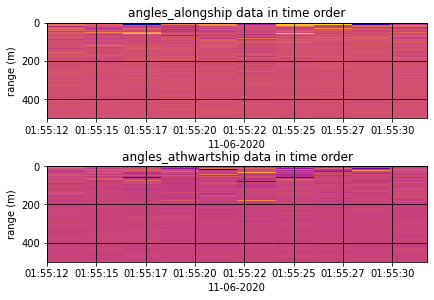

In [44]:
# Create another axis.
ax_3 = fig.add_subplot(3, 1, 3)
# Create an echogram which will display on our newly created axis.
echogram_3 = echogram.Echogram(ax_3, Sv, threshold=[-70,-34])
ax_3.set_title("Sv data in time order")

# Show our figure.
show()

# Create another matplotlib figure.
fig = figure()
# Set some properties for the sub plot layout.
subplots_adjust(left=0.1, bottom=0.1, right=0.98, top=.93, wspace=None,
                hspace=0.5)

angle_cmap = get_cmap('plasma')

# Now request angles data in time order.
angles_along, angles_athwart = raw_data_38_1.get_physical_angles()
print(angles_along)
print(angles_athwart)

# Create another axis.
ax_1 = fig.add_subplot(2, 1, 1)
# Create an echogram which will display on our newly created axis.
echogram_3 = echogram.Echogram(ax_1, angles_along, cmap=angle_cmap)
ax_1.set_title("angles_alongship data in time order")

# Create another axis.
ax_2 = fig.add_subplot(2, 1, 2)
# Create an echogram which will display on our newly created axis.
echogram_3 = echogram.Echogram(ax_2, angles_athwart, cmap=angle_cmap)
ax_2.set_title("angles_athwartship data in time order")

# Show our figure.
show()


pass